# Sprawozdanie z Laboratorium NN5

autor: `Szymon Gut`

Tematem zadania było dodanie 4 funkcji aktywacji oraz przetestowanie ich na wymienionych zbiorach. 

W ramach tej pracy domowej zaimplemntowałem wszystkie 4 funkcje aktywacji oraz dodatkowo dodałem LeakyRelu, będącą modyfikacją funkcji Relu, która radzi sobie w sytuacji gdy funkcja Relu utknie w martwym punkcie i zwraca same wartości 0. Następnie przetestowałem po 3 architektury odpowiednio z jedną, dwoma i trzema warstwami ukrytymi oraz każdą z nich przetestowałem dla każdej funkcji aktywacji na zbiorze mulitmodal. Następnie rozpocząłem testowanie najlepszej z tych 3 architektur na 3 zbiorach: Steps-large, Rings3-regular oraz Rings5-regular oczywiście testując przy tym każdą funkcję aktywacji z osobna.

Laboratoria przebiegły bez żadnych problemów, a wizualizacje oraz porównania wyników dla różnych funkcji aktywacji są umieszczone w raporcie.



In [1]:
import os
os.chdir('..')


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from network import NN
from activation_functions import *
from metrics import *
from prepare_data import read_classification_data, read_regression_data

In [3]:
def plot_results(x, y_true, y_preds):
    plt.figure(figsize=[16, 4])
    plt.subplot(141)
    plt.scatter(x, y_true)
    plt.title('Oryginalne dane')
    plt.subplot(142)
    plt.scatter(x, y_preds[0])
    plt.title('Architektura 1')
    plt.subplot(143)
    plt.scatter(x, y_preds[1])
    plt.title('Architektura 2')
    plt.subplot(144)
    plt.scatter(x, y_preds[2])
    plt.title('Architektura 3')
    plt.show()

In [4]:
def plot_learn_curve(model, metric, verbose):
    plt.plot(model.history['train'], label='Train')
    plt.plot(model.history['test'], label='Test')
    plt.xlabel(f"epochs * {verbose}")
    plt.ylabel(f"{metric}")
    plt.title(f'{metric} during training and testing')
    plt.legend()
    plt.show()

# Część dodatkowa zadania

In [5]:
m_x_train, m_y_train, m_x_test, m_y_test = read_regression_data('multimodal-large', index_col=None)

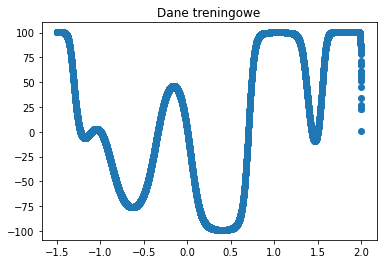

In [5]:
plt.scatter(m_x_train, m_y_train)
plt.title('Dane treningowe')
plt.show()

## Sigmoid

In [5]:
architecture1 = [32, 1]
architecture2 = [32, 32, 1]
architecture3 = [16, 32, 16, 1]
results_df = pd.DataFrame(columns=['MSE - Architecture1', 'MSE - Architecture2', 'MSE - Architecture3'])

In [10]:
nn_sig_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1, activations=[Sigmoid(), Linear()])
nn_sig_a1.fit(m_x_train, m_y_train, batch_size=64, n_epochs=300, learning_rate=0.03, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/300
Mse on training set: 417.81 Mse on test set: 446.55
Epoch number 20/300
Mse on training set: 82.55 Mse on test set: 87.4
Epoch number 30/300
Mse on training set: 34.2 Mse on test set: 32.54
Epoch number 40/300
Mse on training set: 19.98 Mse on test set: 15.73
Epoch number 50/300
Mse on training set: 14.97 Mse on test set: 10.04
Epoch number 60/300
Mse on training set: 13.06 Mse on test set: 8.12
Epoch number 70/300
Mse on training set: 11.89 Mse on test set: 6.68
Epoch number 80/300
Mse on training set: 11.03 Mse on test set: 6.0
Epoch number 90/300
Mse on training set: 10.32 Mse on test set: 5.01
Epoch number 100/300
Mse on training set: 10.11 Mse on test set: 4.97
Epoch number 110/300
Mse on training set: 9.83 Mse on test set: 4.56
Epoch number 120/300
Mse on training set: 9.52 Mse on test set: 4.43
Epoch number 130/300
Mse on training set: 9.25 Mse on test set: 3.95
Epoch number 140/300
Mse on training set: 9.05 Mse on test set: 3.88
Epoch number 150/300
Mse on t

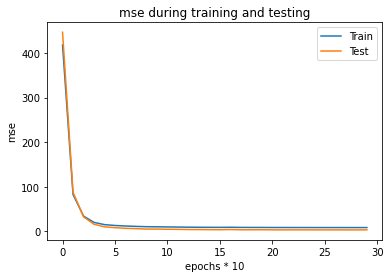

In [57]:
plot_learn_curve(nn_sig_a1, "mse", 10)

In [20]:
nn_sig_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2, activations=[Sigmoid(), Sigmoid(), Linear()], seed=123)
nn_sig_a2.fit(m_x_train, m_y_train, batch_size=16, n_epochs=300, learning_rate=0.001, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/300
Mse on training set: 1451.14 Mse on test set: 1590.24
Epoch number 20/300
Mse on training set: 1051.71 Mse on test set: 1138.88
Epoch number 30/300
Mse on training set: 939.09 Mse on test set: 1016.57
Epoch number 40/300
Mse on training set: 696.03 Mse on test set: 752.38
Epoch number 50/300
Mse on training set: 517.61 Mse on test set: 560.79
Epoch number 60/300
Mse on training set: 292.33 Mse on test set: 316.92
Epoch number 70/300
Mse on training set: 179.49 Mse on test set: 192.11
Epoch number 80/300
Mse on training set: 114.03 Mse on test set: 119.78
Epoch number 90/300
Mse on training set: 76.29 Mse on test set: 78.4
Epoch number 100/300
Mse on training set: 54.5 Mse on test set: 54.76
Epoch number 110/300
Mse on training set: 44.03 Mse on test set: 42.63
Epoch number 120/300
Mse on training set: 33.5 Mse on test set: 31.5
Epoch number 130/300
Mse on training set: 78.02 Mse on test set: 80.59
Epoch number 140/300
Mse on training set: 22.48 Mse on test set: 19.4

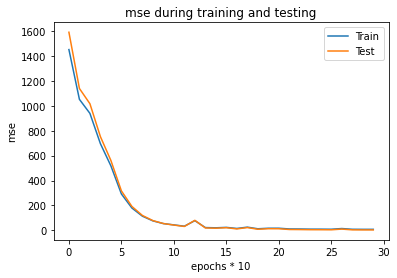

In [58]:
plot_learn_curve(nn_sig_a2, "mse", 10)

In [27]:
nn_sig_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3, activations=[Sigmoid(), Sigmoid(), Sigmoid(), Linear()], seed=123)
nn_sig_a3.fit(m_x_train, m_y_train, batch_size=6, n_epochs=300, learning_rate=0.003, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/300
Mse on training set: 653.06 Mse on test set: 689.86
Epoch number 20/300
Mse on training set: 296.07 Mse on test set: 332.64
Epoch number 30/300
Mse on training set: 354.57 Mse on test set: 394.99
Epoch number 40/300
Mse on training set: 228.09 Mse on test set: 258.58
Epoch number 50/300
Mse on training set: 355.65 Mse on test set: 396.92
Epoch number 60/300
Mse on training set: 294.67 Mse on test set: 330.65
Epoch number 70/300
Mse on training set: 178.51 Mse on test set: 177.04
Epoch number 80/300
Mse on training set: 15.58 Mse on test set: 10.6
Epoch number 90/300
Mse on training set: 8.02 Mse on test set: 3.04
Epoch number 100/300
Mse on training set: 7.49 Mse on test set: 2.58
Epoch number 110/300
Mse on training set: 7.1 Mse on test set: 2.16
Epoch number 120/300
Mse on training set: 7.13 Mse on test set: 2.24
Epoch number 130/300
Mse on training set: 6.4 Mse on test set: 2.21
Epoch number 140/300
Mse on training set: 7.04 Mse on test set: 2.18
Epoch number 150

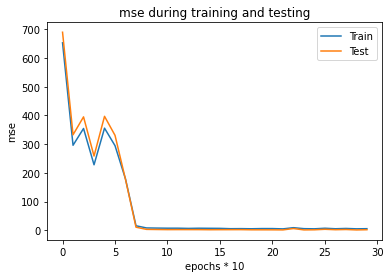

In [59]:
plot_learn_curve(nn_sig_a3, "mse", 10)

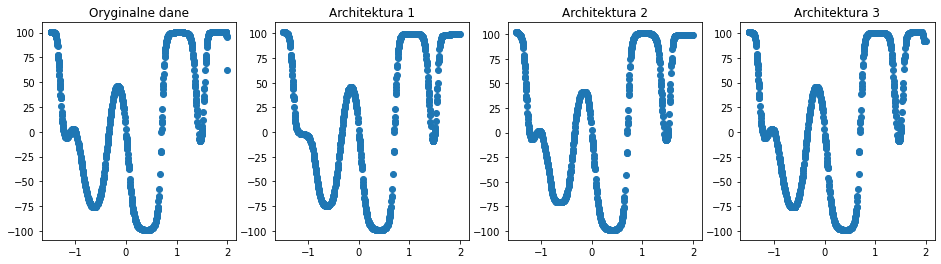

In [36]:
results_sigmoid = [
    nn_sig_a1.predict(m_x_test),
    nn_sig_a2.predict(m_x_test),
    nn_sig_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_sigmoid)

In [37]:
results_df.loc['Sigmoid'] = [Mse().calculate(m_y_test, y_pred) for y_pred in results_sigmoid]

## Funkcja liniowa

In [39]:
nn_lin_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1, activations=[Linear(), Linear()])
nn_lin_a1.fit(m_x_train, m_y_train, batch_size=16, n_epochs=200, learning_rate=0.00005, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/200
Mse on training set: 4398.38 Mse on test set: 4433.74
Epoch number 20/200
Mse on training set: 4398.42 Mse on test set: 4434.07
Epoch number 30/200
Mse on training set: 4398.29 Mse on test set: 4433.82
Epoch number 40/200
Mse on training set: 4398.6 Mse on test set: 4434.42
Epoch number 50/200
Mse on training set: 4398.24 Mse on test set: 4433.67
Epoch number 60/200
Mse on training set: 4398.88 Mse on test set: 4434.54
Epoch number 70/200
Mse on training set: 4398.29 Mse on test set: 4433.59
Epoch number 80/200
Mse on training set: 4398.35 Mse on test set: 4433.71
Epoch number 90/200
Mse on training set: 4398.34 Mse on test set: 4433.95
Epoch number 100/200
Mse on training set: 4398.28 Mse on test set: 4433.91
Epoch number 110/200
Mse on training set: 4398.26 Mse on test set: 4433.66
Epoch number 120/200
Mse on training set: 4398.39 Mse on test set: 4434.03
Epoch number 130/200
Mse on training set: 4398.58 Mse on test set: 4434.31
Epoch number 140/200
Mse on trainin

In [40]:
nn_lin_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2, activations=[Linear(), Linear(), Linear()])
nn_lin_a2.fit(m_x_train, m_y_train, batch_size=16, n_epochs=100, learning_rate=0.0005, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/100
Mse on training set: 4398.28 Mse on test set: 4433.61
Epoch number 20/100
Mse on training set: 4398.26 Mse on test set: 4433.85
Epoch number 30/100
Mse on training set: 4398.31 Mse on test set: 4433.64
Epoch number 40/100
Mse on training set: 4398.26 Mse on test set: 4433.79
Epoch number 50/100
Mse on training set: 4398.28 Mse on test set: 4433.59
Epoch number 60/100
Mse on training set: 4398.51 Mse on test set: 4434.26
Epoch number 70/100
Mse on training set: 4398.22 Mse on test set: 4433.7
Epoch number 80/100
Mse on training set: 4398.29 Mse on test set: 4433.92
Epoch number 90/100
Mse on training set: 4398.27 Mse on test set: 4433.64
Epoch number 100/100
Mse on training set: 4398.39 Mse on test set: 4433.58


In [43]:
nn_lin_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3, activations=[Linear(), Linear(), Linear(), Linear()])
nn_lin_a3.fit(m_x_train, m_y_train, batch_size=32, n_epochs=100, learning_rate=0.00001, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/100
Mse on training set: 4398.23 Mse on test set: 4433.73
Epoch number 20/100
Mse on training set: 4398.37 Mse on test set: 4433.77
Epoch number 30/100
Mse on training set: 4398.54 Mse on test set: 4434.44
Epoch number 40/100
Mse on training set: 4399.63 Mse on test set: 4435.97
Epoch number 50/100
Mse on training set: 4398.47 Mse on test set: 4433.62
Epoch number 60/100
Mse on training set: 4399.53 Mse on test set: 4435.42
Epoch number 70/100
Mse on training set: 4398.46 Mse on test set: 4434.29
Epoch number 80/100
Mse on training set: 4398.91 Mse on test set: 4434.97
Epoch number 90/100
Mse on training set: 4399.01 Mse on test set: 4433.9
Epoch number 100/100
Mse on training set: 4399.61 Mse on test set: 4435.8


Dla liniowej funkcji aktywacji we wszystkich warstwach, czego też mogliśmy się spodziewać nie jesteśmy w stanie estymować żądanej funkcji

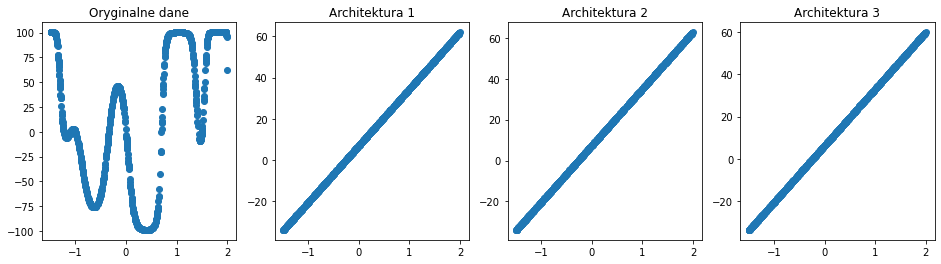

In [44]:
results_linear = [
    nn_lin_a1.predict(m_x_test),
    nn_lin_a2.predict(m_x_test),
    nn_lin_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_linear)

In [45]:
results_df.loc['Linear'] = [Mse().calculate(m_y_test, y_pred) for y_pred in results_linear]

## Tanh

In [25]:
nn_tanh_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1,
        activations=[Tanh(), Linear()])

nn_tanh_a1.fit(m_x_train, m_y_train, batch_size=6, n_epochs=200, learning_rate=0.0005, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/200
Mse on training set: 723.88 Mse on test set: 776.7
Epoch number 20/200
Mse on training set: 326.11 Mse on test set: 360.12
Epoch number 30/200
Mse on training set: 306.14 Mse on test set: 337.4
Epoch number 40/200
Mse on training set: 296.77 Mse on test set: 329.36
Epoch number 50/200
Mse on training set: 292.02 Mse on test set: 323.31
Epoch number 60/200
Mse on training set: 286.95 Mse on test set: 317.18
Epoch number 70/200
Mse on training set: 292.7 Mse on test set: 320.82
Epoch number 80/200
Mse on training set: 125.72 Mse on test set: 140.8
Epoch number 90/200
Mse on training set: 59.48 Mse on test set: 66.47
Epoch number 100/200
Mse on training set: 32.39 Mse on test set: 32.85
Epoch number 110/200
Mse on training set: 21.78 Mse on test set: 19.54
Epoch number 120/200
Mse on training set: 14.31 Mse on test set: 11.53
Epoch number 130/200
Mse on training set: 11.48 Mse on test set: 7.77
Epoch number 140/200
Mse on training set: 10.54 Mse on test set: 6.32
Epoch

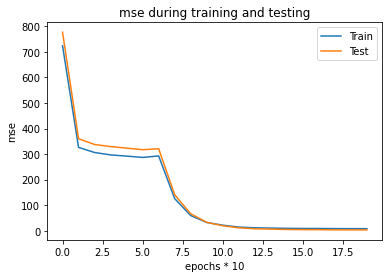

In [60]:
plot_learn_curve(nn_tanh_a1, "mse", 10)

In [69]:
nn_tanh_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2,
        activations=[Tanh(), Tanh(), Linear()])

nn_tanh_a2.fit(m_x_train, m_y_train, batch_size=32, n_epochs=180, learning_rate=0.001, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/180
Mse on training set: 527.67 Mse on test set: 568.09
Epoch number 20/180
Mse on training set: 77.48 Mse on test set: 82.41
Epoch number 30/180
Mse on training set: 27.7 Mse on test set: 26.38
Epoch number 40/180
Mse on training set: 16.92 Mse on test set: 13.38
Epoch number 50/180
Mse on training set: 18.64 Mse on test set: 14.89
Epoch number 60/180
Mse on training set: 20.49 Mse on test set: 15.6
Epoch number 70/180
Mse on training set: 52.46 Mse on test set: 46.36
Epoch number 80/180
Mse on training set: 14.87 Mse on test set: 10.04
Epoch number 90/180
Mse on training set: 10.85 Mse on test set: 6.45
Epoch number 100/180
Mse on training set: 14.87 Mse on test set: 10.19
Epoch number 110/180
Mse on training set: 22.24 Mse on test set: 17.4
Epoch number 120/180
Mse on training set: 10.74 Mse on test set: 6.6
Epoch number 130/180
Mse on training set: 9.78 Mse on test set: 5.18
Epoch number 140/180
Mse on training set: 10.2 Mse on test set: 5.97
Epoch number 150/180
Ms

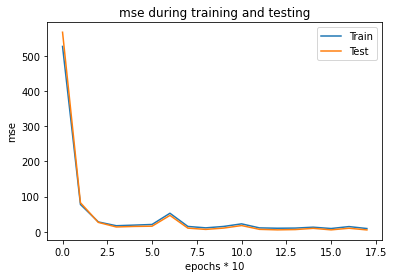

In [70]:
plot_learn_curve(nn_tanh_a2, "mse", 10)

In [72]:
nn_tanh_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3,
        activations=[Tanh(), Tanh(), Tanh(), Linear()])

nn_tanh_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=160, learning_rate=0.00003, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/160
Mse on training set: 1056.49 Mse on test set: 1083.07
Epoch number 20/160
Mse on training set: 294.05 Mse on test set: 295.34
Epoch number 30/160
Mse on training set: 100.82 Mse on test set: 94.13
Epoch number 40/160
Mse on training set: 49.97 Mse on test set: 44.51
Epoch number 50/160
Mse on training set: 29.04 Mse on test set: 24.24
Epoch number 60/160
Mse on training set: 20.21 Mse on test set: 15.6
Epoch number 70/160
Mse on training set: 13.75 Mse on test set: 9.89
Epoch number 80/160
Mse on training set: 23.7 Mse on test set: 18.15
Epoch number 90/160
Mse on training set: 8.84 Mse on test set: 5.02
Epoch number 100/160
Mse on training set: 7.75 Mse on test set: 3.74
Epoch number 110/160
Mse on training set: 7.5 Mse on test set: 3.27
Epoch number 120/160
Mse on training set: 6.55 Mse on test set: 2.97
Epoch number 130/160
Mse on training set: 6.09 Mse on test set: 2.46
Epoch number 140/160
Mse on training set: 6.97 Mse on test set: 4.07
Epoch number 150/160
Mse

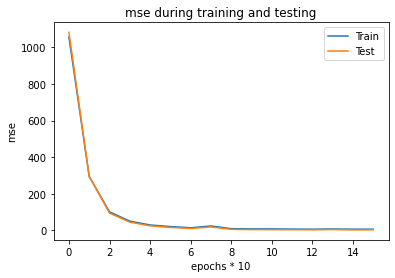

In [73]:
plot_learn_curve(nn_tanh_a3, "mse", 10)

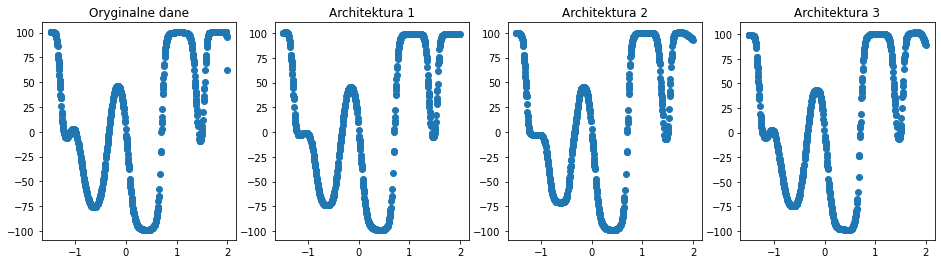

In [74]:
results_tanh = [
    nn_tanh_a1.predict(m_x_test),
    nn_tanh_a2.predict(m_x_test),
    nn_tanh_a3.predict(m_x_test)
]
plot_results(m_x_test, y_true=m_y_test, y_preds=results_tanh)

In [75]:
results_df.loc['Tanh'] = [Mse().calculate(m_y_test, y_pred) for y_pred in results_tanh]

In [81]:
results_df.to_csv('results.csv')

## Relu

In [19]:
nn_relu_a1 = NN(input_shape=m_x_train.shape, neurons_num=architecture1,
        activations=[Relu(), Linear()])

nn_relu_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=60, learning_rate=0.0001, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/60
Mse on training set: 1951.56 Mse on test set: 1926.2
Epoch number 20/60
Mse on training set: 1486.53 Mse on test set: 1531.17
Epoch number 30/60
Mse on training set: 1408.56 Mse on test set: 1443.74
Epoch number 40/60
Mse on training set: 1361.77 Mse on test set: 1403.01
Epoch number 50/60
Mse on training set: 1418.47 Mse on test set: 1480.6
Epoch number 60/60
Mse on training set: 1359.86 Mse on test set: 1414.8


In [20]:
nn_relu_a1.fit(m_x_train, m_y_train, batch_size=4, n_epochs=140, learning_rate=0.00001, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/140
Mse on training set: 1346.63 Mse on test set: 1394.92
Epoch number 20/140
Mse on training set: 1353.0 Mse on test set: 1395.42
Epoch number 30/140
Mse on training set: 1345.57 Mse on test set: 1390.75
Epoch number 40/140
Mse on training set: 1345.19 Mse on test set: 1393.46
Epoch number 50/140
Mse on training set: 1358.32 Mse on test set: 1399.57
Epoch number 60/140
Mse on training set: 1344.55 Mse on test set: 1392.44
Epoch number 70/140
Mse on training set: 1360.48 Mse on test set: 1401.74
Epoch number 80/140
Mse on training set: 1343.4 Mse on test set: 1388.54
Epoch number 90/140
Mse on training set: 1345.54 Mse on test set: 1389.91
Epoch number 100/140
Mse on training set: 1343.69 Mse on test set: 1392.78
Epoch number 110/140
Mse on training set: 1344.3 Mse on test set: 1394.36
Epoch number 120/140
Mse on training set: 1341.12 Mse on test set: 1388.42
Epoch number 130/140
Mse on training set: 1351.12 Mse on test set: 1393.34
Epoch number 140/140
Mse on training 

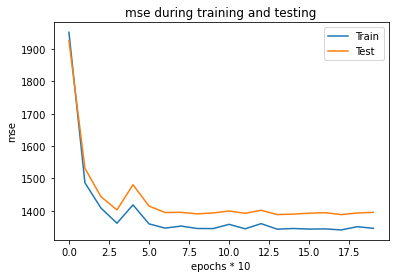

In [21]:
plot_learn_curve(nn_relu_a1, "mse", 10)

In [18]:
nn_relu_a2 = NN(input_shape=m_x_train.shape, neurons_num=architecture2,
        activations=[Relu(), Relu(), Linear()])
nn_relu_a2.fit(m_x_train, m_y_train, batch_size=4, n_epochs=70, learning_rate=0.0003, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/70
Mse on training set: 132.16 Mse on test set: 126.61
Epoch number 20/70
Mse on training set: 32.73 Mse on test set: 30.17
Epoch number 30/70
Mse on training set: 31.43 Mse on test set: 28.48
Epoch number 40/70
Mse on training set: 127.0 Mse on test set: 135.39
Epoch number 50/70
Mse on training set: 23.05 Mse on test set: 19.29
Epoch number 60/70
Mse on training set: 24.74 Mse on test set: 20.64
Epoch number 70/70
Mse on training set: 19.11 Mse on test set: 14.66


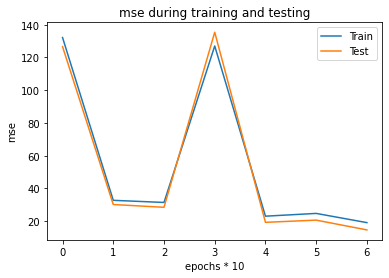

In [22]:
plot_learn_curve(nn_relu_a2, "mse", 10)

In [27]:
nn_relu_a3 = NN(input_shape=m_x_train.shape, neurons_num=architecture3,
        activations=[Relu(), Relu(), Relu(), Linear()])

nn_relu_a3.fit(m_x_train, m_y_train, batch_size=4, n_epochs=80, learning_rate=0.0001, loss=Mse(), metric=Mse(), x_test=m_x_test, y_test=m_y_test, verbose_step=10)

Epoch number 10/80
Mse on training set: 24.12 Mse on test set: 21.25
Epoch number 20/80
Mse on training set: 120.85 Mse on test set: 147.28
Epoch number 30/80
Mse on training set: 11.74 Mse on test set: 8.32
Epoch number 40/80
Mse on training set: 9.04 Mse on test set: 4.54
Epoch number 50/80
Mse on training set: 12.19 Mse on test set: 9.49
Epoch number 60/80
Mse on training set: 8.6 Mse on test set: 6.15
Epoch number 70/80
Mse on training set: 8.09 Mse on test set: 3.99
Epoch number 80/80
Mse on training set: 7.85 Mse on test set: 4.31


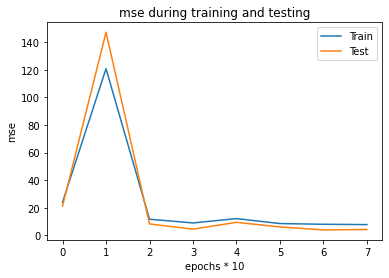

In [28]:
plot_learn_curve(nn_relu_a3, "mse", 10)

In [31]:
results_relu = [
    nn_relu_a1.predict(m_x_test),
    nn_relu_a2.predict(m_x_test),
    nn_relu_a3.predict(m_x_test)
]
results_df.loc['ReLU'] = [Mse().calculate(m_y_test, y_pred) for y_pred in results_relu]

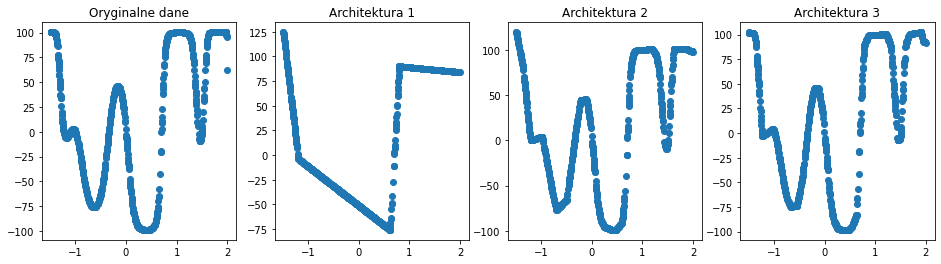

In [32]:

plot_results(m_x_test, y_true=m_y_test, y_preds=results_relu)

In [33]:
results_df

,MSE - Architecture1,MSE - Architecture2,MSE - Architecture3
Sigmoid,3.256278,3.682077,1.857315
Linear,4433.696630,4433.581323,4435.800171
Tanh,3.264200,4.979507,2.635586
ReLU,1395.430509,14.657854,4.307024


# Część obowiązkowa

Najlepsze rezultaty otrzymaliśmy dla trzeciej architektury, więc ją wykorzystamy do obowiązkowych testów

In [124]:
def plot_learn_curve_test(model1, model2, model3, model4, metric, verbose):
    plt.plot(model1.history['test'], label='Sigmoid')
    plt.plot(model2.history['test'], label='Tanh')
    plt.plot(model3.history['test'], label='Relu')
    plt.plot(model4.history['test'], label='Linear')
    plt.xlabel(f"epochs * {verbose}")
    plt.ylabel(f"{metric}")
    plt.title(f'{metric} during testing')
    plt.legend()
    plt.show()

In [123]:
def plot_learn_curve_train(model1, model2, model3, model4, metric, verbose):
    plt.plot(model1.history['train'], label='Sigmoid')
    plt.plot(model2.history['train'], label='Tanh')
    plt.plot(model3.history['train'], label='Relu')
    plt.plot(model4.history['train'], label='Linear')
    plt.xlabel(f"epochs * {verbose}")
    plt.ylabel(f"{metric}")
    plt.title(f'{metric} during training')
    plt.legend()
    plt.show()

In [28]:
def plot_results(x, y_true, y_preds):
    plt.figure(figsize=[16, 4])
    plt.subplot(151)
    plt.scatter(x, y_true)
    plt.title('Oryginalne dane')
    plt.subplot(152)
    plt.scatter(x, y_preds[0])
    plt.title('Sigmoid')
    plt.subplot(153)
    plt.scatter(x, y_preds[1])
    plt.title('Tanh')
    plt.subplot(154)
    plt.scatter(x, y_preds[2])
    plt.title('Relu')
    plt.subplot(155)
    plt.scatter(x, y_preds[3])
    plt.title('Linear')
    plt.show()

## Steps-Large

In [6]:
sl_x_train, sl_y_train, sl_x_test, sl_y_test = read_regression_data('steps-large')

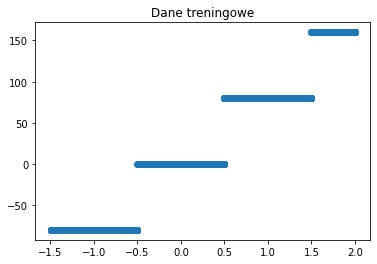

In [18]:
plt.scatter(sl_x_train, sl_y_train)
plt.title('Dane treningowe')
plt.show()

### Sigmoid

In [14]:
nn_sig_sl = NN(input_shape=sl_x_train.shape, neurons_num=architecture3,
        activations=[Sigmoid(), Sigmoid(), Sigmoid(), Linear()])

nn_sig_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.0001, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Mse on training set: 198.69 Mse on test set: 191.79
Epoch number 20/100
Mse on training set: 93.77 Mse on test set: 109.12
Epoch number 30/100
Mse on training set: 49.59 Mse on test set: 47.04
Epoch number 40/100
Mse on training set: 72.04 Mse on test set: 87.95
Epoch number 50/100
Mse on training set: 44.52 Mse on test set: 32.96
Epoch number 60/100
Mse on training set: 60.07 Mse on test set: 76.31
Epoch number 70/100
Mse on training set: 93.48 Mse on test set: 139.84
Epoch number 80/100
Mse on training set: 39.95 Mse on test set: 27.58
Epoch number 90/100
Mse on training set: 48.94 Mse on test set: 63.63
Epoch number 100/100
Mse on training set: 49.31 Mse on test set: 64.07


In [15]:
nn_sig_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.00005, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Mse on training set: 24.41 Mse on test set: 25.45
Epoch number 20/100
Mse on training set: 23.57 Mse on test set: 23.94
Epoch number 30/100
Mse on training set: 26.28 Mse on test set: 29.59
Epoch number 40/100
Mse on training set: 31.74 Mse on test set: 17.23
Epoch number 50/100
Mse on training set: 24.81 Mse on test set: 20.24
Epoch number 60/100
Mse on training set: 22.07 Mse on test set: 19.16
Epoch number 70/100
Mse on training set: 20.17 Mse on test set: 13.27
Epoch number 80/100
Mse on training set: 19.01 Mse on test set: 17.34
Epoch number 90/100
Mse on training set: 28.82 Mse on test set: 34.85
Epoch number 100/100
Mse on training set: 25.78 Mse on test set: 13.1


### Tanh

In [12]:
nn_tan_sl = NN(input_shape=sl_x_train.shape, neurons_num=architecture3,
        activations=[Tanh(), Tanh(), Tanh(), Linear()])

nn_tan_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=100, learning_rate=0.0001, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Mse on training set: 61.64 Mse on test set: 49.83
Epoch number 20/100
Mse on training set: 69.93 Mse on test set: 90.26
Epoch number 30/100
Mse on training set: 36.54 Mse on test set: 29.32
Epoch number 40/100
Mse on training set: 38.72 Mse on test set: 29.52
Epoch number 50/100
Mse on training set: 34.49 Mse on test set: 22.19
Epoch number 60/100
Mse on training set: 38.25 Mse on test set: 38.35
Epoch number 70/100
Mse on training set: 55.11 Mse on test set: 71.54
Epoch number 80/100
Mse on training set: 34.3 Mse on test set: 18.64
Epoch number 90/100
Mse on training set: 22.09 Mse on test set: 16.52
Epoch number 100/100
Mse on training set: 21.5 Mse on test set: 24.47


In [13]:
nn_tan_sl.fit(sl_x_train, sl_y_train, batch_size=64, n_epochs=100, learning_rate=0.00005, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/100
Mse on training set: 10.24 Mse on test set: 7.26
Epoch number 20/100
Mse on training set: 8.21 Mse on test set: 6.24
Epoch number 30/100
Mse on training set: 8.06 Mse on test set: 6.44
Epoch number 40/100
Mse on training set: 6.09 Mse on test set: 4.94
Epoch number 50/100
Mse on training set: 5.26 Mse on test set: 6.54
Epoch number 60/100
Mse on training set: 5.28 Mse on test set: 4.9
Epoch number 70/100
Mse on training set: 7.63 Mse on test set: 3.67
Epoch number 80/100
Mse on training set: 6.45 Mse on test set: 6.47
Epoch number 90/100
Mse on training set: 5.41 Mse on test set: 8.29
Epoch number 100/100
Mse on training set: 3.74 Mse on test set: 3.32


### Relu

In [20]:
nn_relu_sl = NN(input_shape=sl_x_train.shape, neurons_num=architecture3,
        activations=[Relu(), Relu(), Relu(), Linear()])

nn_relu_sl.fit(sl_x_train, sl_y_train, batch_size=4, n_epochs=30, learning_rate=0.0001, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/30
Mse on training set: 81.27 Mse on test set: 78.38
Epoch number 20/30
Mse on training set: 64.67 Mse on test set: 88.23
Epoch number 30/30
Mse on training set: 39.07 Mse on test set: 35.71


In [21]:
nn_relu_sl.fit(sl_x_train, sl_y_train, batch_size=64, n_epochs=170, learning_rate=0.00001, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/170
Mse on training set: 30.19 Mse on test set: 27.79
Epoch number 20/170
Mse on training set: 29.66 Mse on test set: 28.39
Epoch number 30/170
Mse on training set: 29.17 Mse on test set: 27.63
Epoch number 40/170
Mse on training set: 28.71 Mse on test set: 26.4
Epoch number 50/170
Mse on training set: 28.3 Mse on test set: 25.77
Epoch number 60/170
Mse on training set: 27.9 Mse on test set: 25.91
Epoch number 70/170
Mse on training set: 27.52 Mse on test set: 24.95
Epoch number 80/170
Mse on training set: 27.16 Mse on test set: 24.75
Epoch number 90/170
Mse on training set: 26.83 Mse on test set: 24.12
Epoch number 100/170
Mse on training set: 26.5 Mse on test set: 24.0
Epoch number 110/170
Mse on training set: 26.19 Mse on test set: 23.56
Epoch number 120/170
Mse on training set: 25.89 Mse on test set: 23.12
Epoch number 130/170
Mse on training set: 25.64 Mse on test set: 22.57
Epoch number 140/170
Mse on training set: 25.33 Mse on test set: 23.16
Epoch number 150/170

### Liniowa

In [23]:
nn_lin_sl = NN(input_shape=sl_x_train.shape, neurons_num=architecture3, activations=[Linear(), Linear(), Linear(), Linear()])
nn_lin_sl.fit(sl_x_train, sl_y_train, batch_size=32, n_epochs=200, learning_rate=0.00001, loss=Mse(), metric=Mse(), x_test=sl_x_test, y_test=sl_y_test, verbose_step=10)

Epoch number 10/200
Mse on training set: 518.02 Mse on test set: 528.58
Epoch number 20/200
Mse on training set: 518.16 Mse on test set: 528.49
Epoch number 30/200
Mse on training set: 518.04 Mse on test set: 528.32
Epoch number 40/200
Mse on training set: 518.01 Mse on test set: 528.76
Epoch number 50/200
Mse on training set: 518.08 Mse on test set: 529.04
Epoch number 60/200
Mse on training set: 518.14 Mse on test set: 528.56
Epoch number 70/200
Mse on training set: 518.5 Mse on test set: 529.61
Epoch number 80/200
Mse on training set: 517.98 Mse on test set: 528.68
Epoch number 90/200
Mse on training set: 518.03 Mse on test set: 528.59
Epoch number 100/200
Mse on training set: 518.32 Mse on test set: 529.28
Epoch number 110/200
Mse on training set: 518.47 Mse on test set: 528.62
Epoch number 120/200
Mse on training set: 517.99 Mse on test set: 528.48
Epoch number 130/200
Mse on training set: 518.09 Mse on test set: 529.03
Epoch number 140/200
Mse on training set: 518.23 Mse on test 

In [26]:
results_sl= [
    nn_sig_sl.predict(sl_x_test),
    nn_tan_sl.predict(sl_x_test),
    nn_relu_sl.predict(sl_x_test),
    nn_lin_sl.predict(sl_x_test)
]

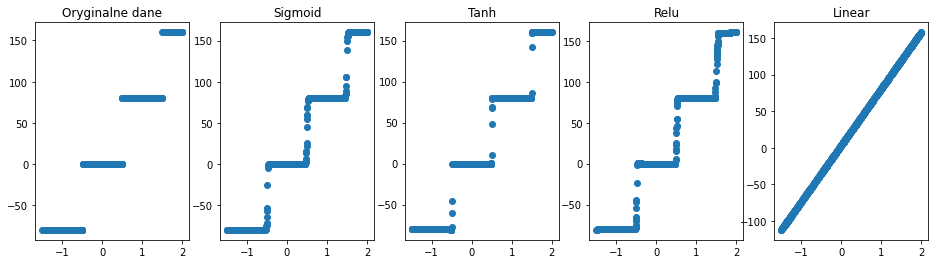

In [29]:
plot_results(sl_x_test,sl_y_test,results_sl)

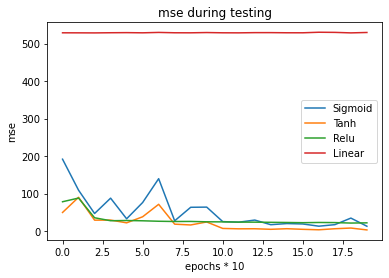

In [125]:
plot_learn_curve_test(nn_sig_sl,nn_tan_sl,nn_relu_sl,nn_lin_sl, "mse", 10)

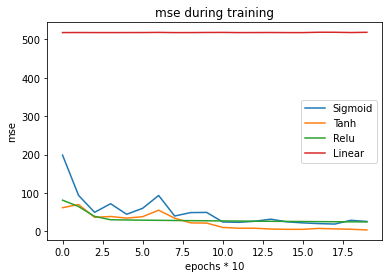

In [126]:
plot_learn_curve_train(nn_sig_sl,nn_tan_sl,nn_relu_sl,nn_lin_sl, "mse", 10)

## Rings3-regular

In [32]:
r3_x_train, r3_y_train, r3_x_test, r3_y_test = read_classification_data('rings3-regular')

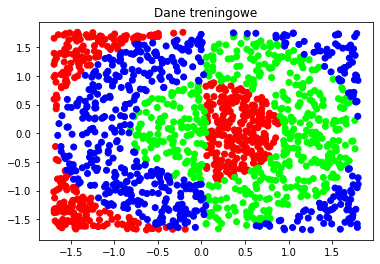

In [78]:
plt.scatter(r3_x_train[:, 0], r3_x_train[:, 1], c=r3_y_train)
plt.title('Dane treningowe')
plt.show()

In [64]:
def compare_results_plot_classification(x_test, y_test, model1, model2, model3, model4):
    plt.figure(figsize=[12, 4])
    plt.subplot(151)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(y_test, axis=1))
    plt.title('Prawidłowe wyniki')
    plt.subplot(152)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(model1.predict(x_test), axis=1))
    plt.title('Aktywacja Sigmoid')
    plt.subplot(153)
    plt.title('Aktywacja Tanh')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(model2.predict(x_test), axis=1))
    plt.subplot(154)
    plt.title('Aktywacja Relu')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(model3.predict(x_test), axis=1))
    plt.subplot(155)
    plt.title('Aktywacja liniowa')
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.argmax(model4.predict(x_test), axis=1))
    plt.show()

In [46]:
architecture3 = [16, 32, 16, 3] #musimy miec 3 outputy na wyjsciu wiec zmieniam tylko liczbe neuronow wyjsciowych

### Sigmoid

In [55]:
nn_sig_r3 = NN(input_shape=r3_x_train.shape, neurons_num=architecture3,
        activations=[Sigmoid(), Sigmoid(), Sigmoid(), Softmax()])


nn_sig_r3.fit(r3_x_train, r3_y_train, batch_size=16, n_epochs=100, learning_rate=0.1, loss=Cross_entropy(), metric=F_score(), x_test=r3_x_test, y_test=r3_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.58 F_score on training set: 0.55 , loss on test set: 0.55 F_score on test set: 0.62
Epoch number 20/100
Loss on training set: 0.57 F_score on training set: 0.54 , loss on test set: 0.55 F_score on test set: 0.59
Epoch number 30/100
Loss on training set: 0.53 F_score on training set: 0.58 , loss on test set: 0.53 F_score on test set: 0.64
Epoch number 40/100
Loss on training set: 0.45 F_score on training set: 0.62 , loss on test set: 0.44 F_score on test set: 0.67
Epoch number 50/100
Loss on training set: 0.29 F_score on training set: 0.86 , loss on test set: 0.28 F_score on test set: 0.86
Epoch number 60/100
Loss on training set: 0.21 F_score on training set: 0.86 , loss on test set: 0.23 F_score on test set: 0.84
Epoch number 70/100
Loss on training set: 0.25 F_score on training set: 0.82 , loss on test set: 0.23 F_score on test set: 0.85
Epoch number 80/100
Loss on training set: 0.13 F_score on training set: 0.93 , loss on test set: 0.14 F_

### Tanh

In [56]:
nn_tanh_r3 = NN(input_shape=r3_x_train.shape, neurons_num=architecture3,
        activations=[Tanh(), Tanh(), Tanh(), Softmax()])

nn_tanh_r3.fit(r3_x_train, r3_y_train, batch_size=16, n_epochs=100, learning_rate=0.1, loss=Cross_entropy(), metric=F_score(), x_test=r3_x_test, y_test=r3_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.17 F_score on training set: 0.89 , loss on test set: 0.18 F_score on test set: 0.88
Epoch number 20/100
Loss on training set: 0.22 F_score on training set: 0.86 , loss on test set: 0.26 F_score on test set: 0.83
Epoch number 30/100
Loss on training set: 0.12 F_score on training set: 0.93 , loss on test set: 0.15 F_score on test set: 0.91
Epoch number 40/100
Loss on training set: 0.1 F_score on training set: 0.94 , loss on test set: 0.11 F_score on test set: 0.93
Epoch number 50/100
Loss on training set: 0.11 F_score on training set: 0.93 , loss on test set: 0.13 F_score on test set: 0.92
Epoch number 60/100
Loss on training set: 0.08 F_score on training set: 0.96 , loss on test set: 0.11 F_score on test set: 0.94
Epoch number 70/100
Loss on training set: 0.13 F_score on training set: 0.91 , loss on test set: 0.16 F_score on test set: 0.9
Epoch number 80/100
Loss on training set: 0.08 F_score on training set: 0.95 , loss on test set: 0.1 F_sco

### Relu

In [59]:
nn_relu_r3 = NN(input_shape=r3_x_train.shape, neurons_num=architecture3,
        activations=[Relu(), Relu(), Relu(), Softmax()])

nn_relu_r3.fit(r3_x_train, r3_y_train, batch_size=16, n_epochs=100, learning_rate=0.1, loss=Cross_entropy(), metric=F_score(), x_test=r3_x_test, y_test=r3_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.28 F_score on training set: 0.8 , loss on test set: 0.29 F_score on test set: 0.8
Epoch number 20/100
Loss on training set: 0.13 F_score on training set: 0.92 , loss on test set: 0.14 F_score on test set: 0.9
Epoch number 30/100
Loss on training set: 0.16 F_score on training set: 0.91 , loss on test set: 0.2 F_score on test set: 0.88
Epoch number 40/100
Loss on training set: 0.12 F_score on training set: 0.93 , loss on test set: 0.14 F_score on test set: 0.91
Epoch number 50/100
Loss on training set: 0.11 F_score on training set: 0.93 , loss on test set: 0.13 F_score on test set: 0.91
Epoch number 60/100
Loss on training set: 0.12 F_score on training set: 0.92 , loss on test set: 0.16 F_score on test set: 0.9
Epoch number 70/100
Loss on training set: 0.19 F_score on training set: 0.89 , loss on test set: 0.19 F_score on test set: 0.89
Epoch number 80/100
Loss on training set: 0.12 F_score on training set: 0.93 , loss on test set: 0.13 F_score

### Linear

In [62]:
nn_lin_r3 = NN(input_shape=r3_x_train.shape, neurons_num=architecture3,
        activations=[Linear(), Linear(), Linear(), Softmax()])

nn_lin_r3.fit(r3_x_train, r3_y_train, batch_size=16, n_epochs=100, learning_rate=0.01, loss=Cross_entropy(), metric=F_score(), x_test=r3_x_test, y_test=r3_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.61 F_score on training set: 0.48 , loss on test set: 0.58 F_score on test set: 0.52
Epoch number 20/100
Loss on training set: 0.6 F_score on training set: 0.35 , loss on test set: 0.6 F_score on test set: 0.32
Epoch number 30/100
Loss on training set: 0.59 F_score on training set: 0.49 , loss on test set: 0.58 F_score on test set: 0.5
Epoch number 40/100
Loss on training set: 0.59 F_score on training set: 0.48 , loss on test set: 0.57 F_score on test set: 0.57
Epoch number 50/100
Loss on training set: 0.59 F_score on training set: 0.48 , loss on test set: 0.58 F_score on test set: 0.48
Epoch number 60/100
Loss on training set: 0.59 F_score on training set: 0.43 , loss on test set: 0.58 F_score on test set: 0.42
Epoch number 70/100
Loss on training set: 0.59 F_score on training set: 0.45 , loss on test set: 0.58 F_score on test set: 0.46
Epoch number 80/100
Loss on training set: 0.59 F_score on training set: 0.47 , loss on test set: 0.58 F_sco

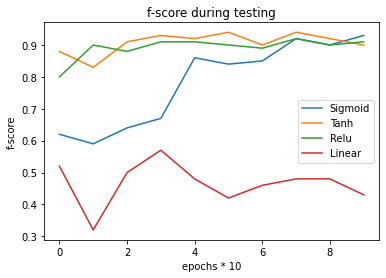

In [127]:
plot_learn_curve_test(nn_sig_r3,nn_tanh_r3,nn_relu_r3,nn_lin_r3, "f-score", 10)

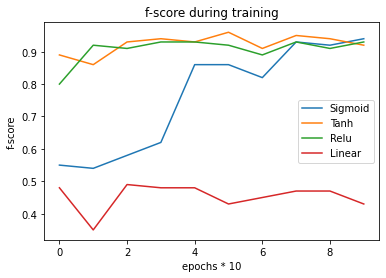

In [128]:
plot_learn_curve_train(nn_sig_r3,nn_tanh_r3,nn_relu_r3,nn_lin_r3, "f-score", 10)

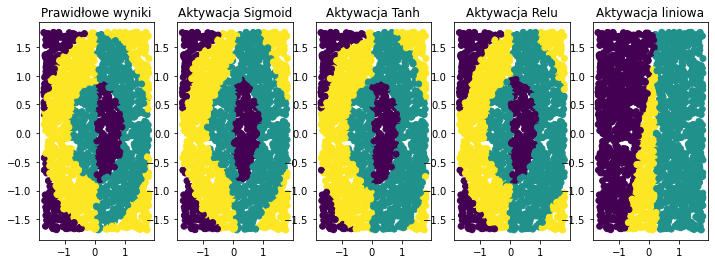

In [65]:
compare_results_plot_classification(r3_x_test, r3_y_test, nn_sig_r3,nn_tanh_r3,nn_relu_r3,nn_lin_r3)

## Rings5-regular

In [74]:
r5_x_train, r5_y_train, r5_x_test, r5_y_test = read_classification_data('rings5-regular')

In [87]:
r5_y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

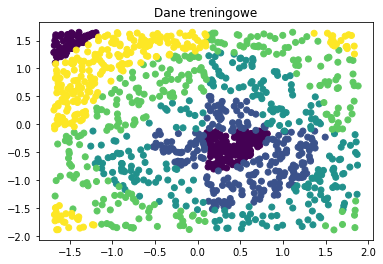

In [88]:
plt.scatter(r5_x_train[:, 0], r5_x_train[:, 1], c=np.argmax(r5_y_train, axis=1))
plt.title('Dane treningowe')
plt.show()

In [90]:
architecture3 = [16, 32, 16, 5] #musimy miec 5 outputow na wyjsciu wiec zmieniam tylko liczbe neuronow wyjsciowych

### Sigmoid

In [92]:
nn_sig_r5 = NN(input_shape=r5_x_train.shape, neurons_num=architecture3,
        activations=[Sigmoid(), Sigmoid(), Sigmoid(), Softmax()])


nn_sig_r5.fit(r5_x_train, r5_y_train, batch_size=16, n_epochs=100, learning_rate=0.1, loss=Cross_entropy(), metric=F_score(), x_test=r5_x_test, y_test=r5_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.43 F_score on training set: 0.37 , loss on test set: 0.43 F_score on test set: 0.38
Epoch number 20/100
Loss on training set: 0.38 F_score on training set: 0.4 , loss on test set: 0.39 F_score on test set: 0.51
Epoch number 30/100
Loss on training set: 0.33 F_score on training set: 0.56 , loss on test set: 0.34 F_score on test set: 0.56
Epoch number 40/100
Loss on training set: 0.28 F_score on training set: 0.63 , loss on test set: 0.3 F_score on test set: 0.63
Epoch number 50/100
Loss on training set: 0.24 F_score on training set: 0.72 , loss on test set: 0.26 F_score on test set: 0.69
Epoch number 60/100
Loss on training set: 0.2 F_score on training set: 0.79 , loss on test set: 0.24 F_score on test set: 0.73
Epoch number 70/100
Loss on training set: 0.16 F_score on training set: 0.85 , loss on test set: 0.19 F_score on test set: 0.81
Epoch number 80/100
Loss on training set: 0.14 F_score on training set: 0.86 , loss on test set: 0.18 F_sco

### Tanh

In [93]:
nn_tanh_r5 = NN(input_shape=r5_x_train.shape, neurons_num=architecture3,
        activations=[Tanh(), Tanh(), Tanh(), Softmax()])


nn_tanh_r5.fit(r5_x_train, r5_y_train, batch_size=16, n_epochs=100, learning_rate=0.1, loss=Cross_entropy(), metric=F_score(), x_test=r5_x_test, y_test=r5_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.16 F_score on training set: 0.85 , loss on test set: 0.22 F_score on test set: 0.76
Epoch number 20/100
Loss on training set: 0.1 F_score on training set: 0.89 , loss on test set: 0.13 F_score on test set: 0.86
Epoch number 30/100
Loss on training set: 0.08 F_score on training set: 0.91 , loss on test set: 0.13 F_score on test set: 0.86
Epoch number 40/100
Loss on training set: 0.12 F_score on training set: 0.89 , loss on test set: 0.17 F_score on test set: 0.83
Epoch number 50/100
Loss on training set: 0.07 F_score on training set: 0.93 , loss on test set: 0.1 F_score on test set: 0.9
Epoch number 60/100
Loss on training set: 0.1 F_score on training set: 0.9 , loss on test set: 0.12 F_score on test set: 0.86
Epoch number 70/100
Loss on training set: 0.08 F_score on training set: 0.91 , loss on test set: 0.11 F_score on test set: 0.87
Epoch number 80/100
Loss on training set: 0.05 F_score on training set: 0.95 , loss on test set: 0.1 F_score 

### Relu

In [94]:
nn_relu_r5 = NN(input_shape=r5_x_train.shape, neurons_num=architecture3,
        activations=[Relu(), Relu(), Relu(), Softmax()])


nn_relu_r5.fit(r5_x_train, r5_y_train, batch_size=16, n_epochs=100, learning_rate=0.1, loss=Cross_entropy(), metric=F_score(), x_test=r5_x_test, y_test=r5_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.21 F_score on training set: 0.77 , loss on test set: 0.26 F_score on test set: 0.74
Epoch number 20/100
Loss on training set: 0.19 F_score on training set: 0.81 , loss on test set: 0.23 F_score on test set: 0.75
Epoch number 30/100
Loss on training set: 0.13 F_score on training set: 0.86 , loss on test set: 0.16 F_score on test set: 0.81
Epoch number 40/100
Loss on training set: 0.17 F_score on training set: 0.83 , loss on test set: 0.2 F_score on test set: 0.78
Epoch number 50/100
Loss on training set: 0.12 F_score on training set: 0.87 , loss on test set: 0.16 F_score on test set: 0.83
Epoch number 60/100
Loss on training set: 0.11 F_score on training set: 0.89 , loss on test set: 0.15 F_score on test set: 0.83
Epoch number 70/100
Loss on training set: 0.1 F_score on training set: 0.89 , loss on test set: 0.14 F_score on test set: 0.84
Epoch number 80/100
Loss on training set: 0.09 F_score on training set: 0.9 , loss on test set: 0.14 F_sco

### Linear

In [96]:
nn_lin_r5 = NN(input_shape=r5_x_train.shape, neurons_num=architecture3,
        activations=[Linear(), Linear(), Linear(), Softmax()])


nn_lin_r5.fit(r5_x_train, r5_y_train, batch_size=16, n_epochs=100, learning_rate=0.01, loss=Cross_entropy(), metric=F_score(), x_test=r5_x_test, y_test=r5_y_test, verbose_step=10, metric_and_loss=True)

Epoch number 10/100
Loss on training set: 0.46 F_score on training set: 0.3 , loss on test set: 0.47 F_score on test set: 0.27
Epoch number 20/100
Loss on training set: 0.46 F_score on training set: 0.33 , loss on test set: 0.46 F_score on test set: 0.37
Epoch number 30/100
Loss on training set: 0.45 F_score on training set: 0.32 , loss on test set: 0.46 F_score on test set: 0.3
Epoch number 40/100
Loss on training set: 0.45 F_score on training set: 0.38 , loss on test set: 0.44 F_score on test set: 0.39
Epoch number 50/100
Loss on training set: 0.44 F_score on training set: 0.36 , loss on test set: 0.44 F_score on test set: 0.35
Epoch number 60/100
Loss on training set: 0.45 F_score on training set: 0.35 , loss on test set: 0.45 F_score on test set: 0.34
Epoch number 70/100
Loss on training set: 0.44 F_score on training set: 0.35 , loss on test set: 0.45 F_score on test set: 0.31
Epoch number 80/100
Loss on training set: 0.44 F_score on training set: 0.32 , loss on test set: 0.44 F_sc

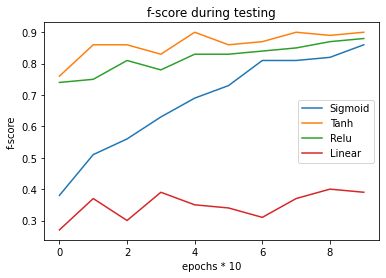

In [129]:
plot_learn_curve_test(nn_sig_r5,nn_tanh_r5,nn_relu_r5,nn_lin_r5, "f-score", 10)

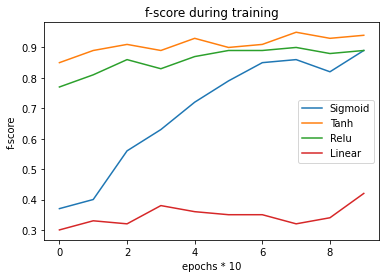

In [130]:
plot_learn_curve_train(nn_sig_r5,nn_tanh_r5,nn_relu_r5,nn_lin_r5, "f-score", 10)

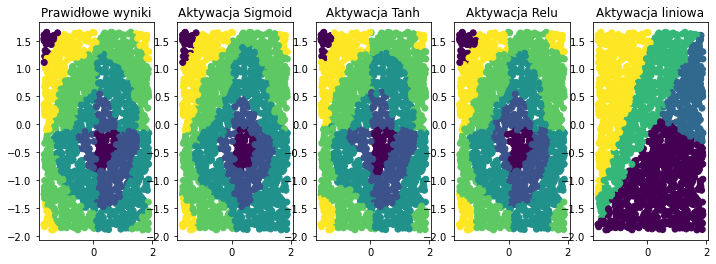

In [98]:
compare_results_plot_classification(r5_x_test, r5_y_test, nn_sig_r5,nn_tanh_r5,nn_relu_r5,nn_lin_r5)

In [118]:
results_df = pd.DataFrame(columns=['MSE - Steps_large', 'F-score - Rings3-regular', 'F-score - Rings5-regular'])

In [119]:
results_sigmoid = [
    nn_sig_sl.predict(sl_x_test),
    nn_sig_r3.predict(r3_x_test),
    nn_sig_r5.predict(r5_x_test)
]
results_tanh = [
    nn_tan_sl.predict(sl_x_test),
    nn_tanh_r3.predict(r3_x_test),
    nn_tanh_r5.predict(r5_x_test)
]
results_relu = [
    nn_relu_sl.predict(sl_x_test),
    nn_relu_r3.predict(r3_x_test),
    nn_relu_r5.predict(r5_x_test)
]
results_linear = [
    nn_lin_sl.predict(sl_x_test),
    nn_lin_r3.predict(r3_x_test),
    nn_lin_r5.predict(r5_x_test)
]


In [120]:
results_df.loc['Sigmoid'] = [Mse().calculate(sl_y_test, results_sigmoid[0]), F_score().calculate(r3_y_test, results_sigmoid[1]), F_score().calculate(r5_y_test, results_sigmoid[2])]
results_df.loc['Tanh'] = [Mse().calculate(sl_y_test, results_tanh[0]), F_score().calculate(r3_y_test, results_tanh[1]), F_score().calculate(r5_y_test, results_tanh[2])]
results_df.loc['Relu'] = [Mse().calculate(sl_y_test, results_relu[0]), F_score().calculate(r3_y_test, results_relu[1]), F_score().calculate(r5_y_test, results_relu[2])]
results_df.loc['Linear'] = [Mse().calculate(sl_y_test, results_linear[0]), F_score().calculate(r3_y_test, results_linear[1]), F_score().calculate(r5_y_test, results_linear[2])]

Tabela podsumowująca powyższe eksperymenty

In [121]:
results_df

,MSE - Steps_large,F-score - Rings3-regular,F-score - Rings5-regular
Sigmoid,13.098516,0.9290,0.8630
Tanh,3.322629,0.9025,0.9045
Relu,22.183930,0.9105,0.8780
Linear,529.447559,0.4270,0.3940


Jak możemy zauważyć z wyników naszych testów, najlepsze MSE zostało uzyskane dla Tanh funkcji aktywacji na zbiorze Steps-large, najlepszy F-score został uzyskany dla funkcji Sigmoi na zbiorze Rings3-regular oraz największy F-score został uzyskany dla funkcji tanh na zbiorze Rings5-regular.

Podsumowując funkcja Tanh najczęsciej dawała najlepsze rezultaty, niemniej jednak funkcje Relu oraz Sigmoid również osiągały bardzo dobre rezultaty. Zastosowanie funkcji liniowej w warstwach ukrytych, co było oczywiste nie przyniosło pozytywnego efektu, gdyż na każdym ze zbiorów sieć nie była w stanie się uczyć. Funkcja Relu lepiej radziła sobie w zadaniach klasyfikacji niż w tych dla regresji i co ważne nie radzi sobie ona najlpeiej w płytkich architekturach.